In [207]:
# Import the libraries 
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [208]:
# Import the data
loan=pd.DataFrame()

In [209]:
loan=pd.read_csv("credit_risk_dataset.csv")

In [210]:
loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [211]:
#Checking the data types of columns
loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

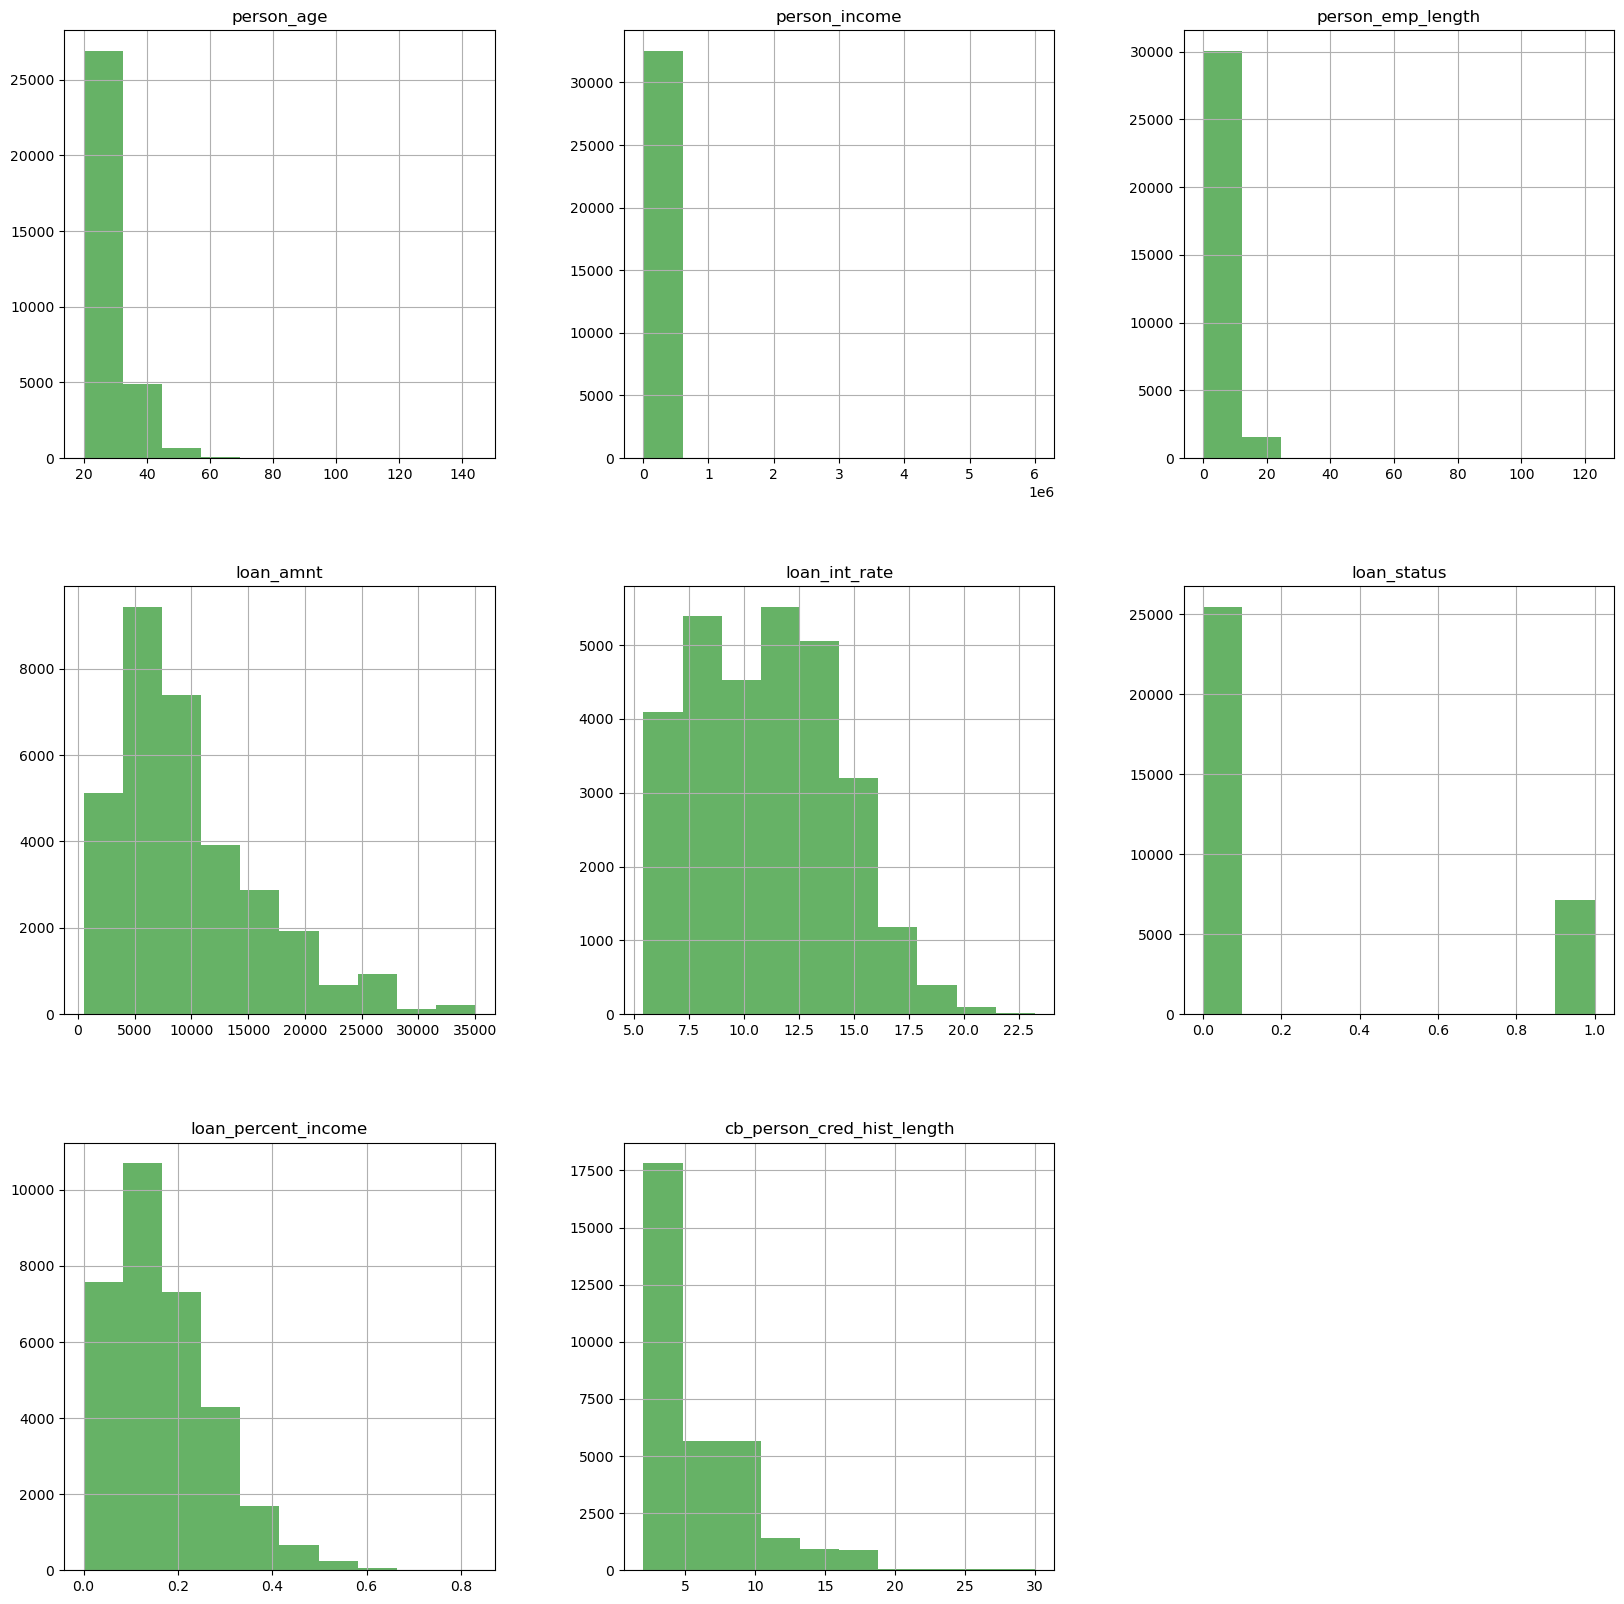

In [212]:
loan.hist(figsize=(20,20),color='g',alpha=0.6)
plt.show()

## Pre processing data

In [214]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Missing values

In [216]:
loan.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Look the descriptive statistics before filling in the missing values

In [218]:
loan.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Filling missing values in numerical column
#### We can fill in the missing values of the loan amount column with the median value. The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data.

In [220]:
loan['person_emp_length'] = loan['person_emp_length'].fillna(loan['person_emp_length'].median())
loan['loan_int_rate'] = loan['loan_int_rate'].fillna(loan['loan_int_rate'].median())

### Now, check the count of the target variable

In [222]:
loan["loan_status"].value_counts() #Loan status == 0 implies loan approval and if 1 then no approval. (output variable)

loan_status
0    25473
1     7108
Name: count, dtype: int64

## Loan amount distribution

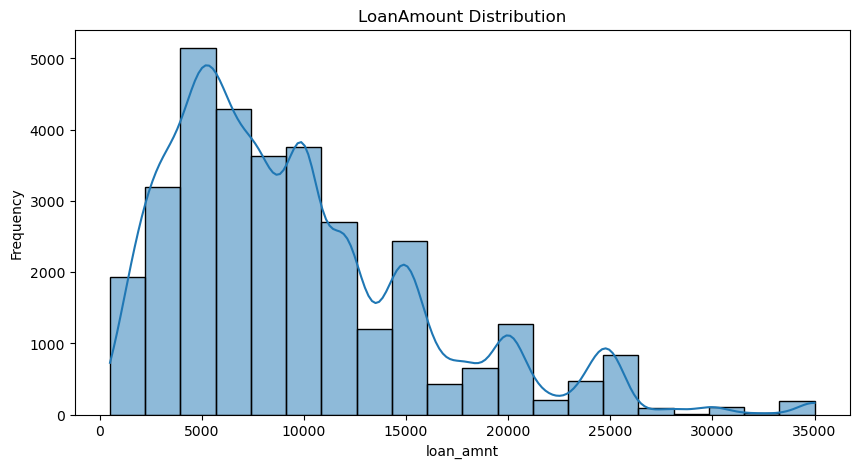

In [224]:
loan['loan_amnt'] = pd.to_numeric(loan['loan_amnt'], errors='coerce')
plt.figure(figsize=(10,5))
sns.histplot(data=loan, x='loan_amnt', bins=20, kde=True)
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution')
plt.show()

## Loan status vs Property area

In [226]:
fig_property_area = px.histogram(loan, x='person_home_ownership', color='loan_status',
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

## Loan amount and loan intention

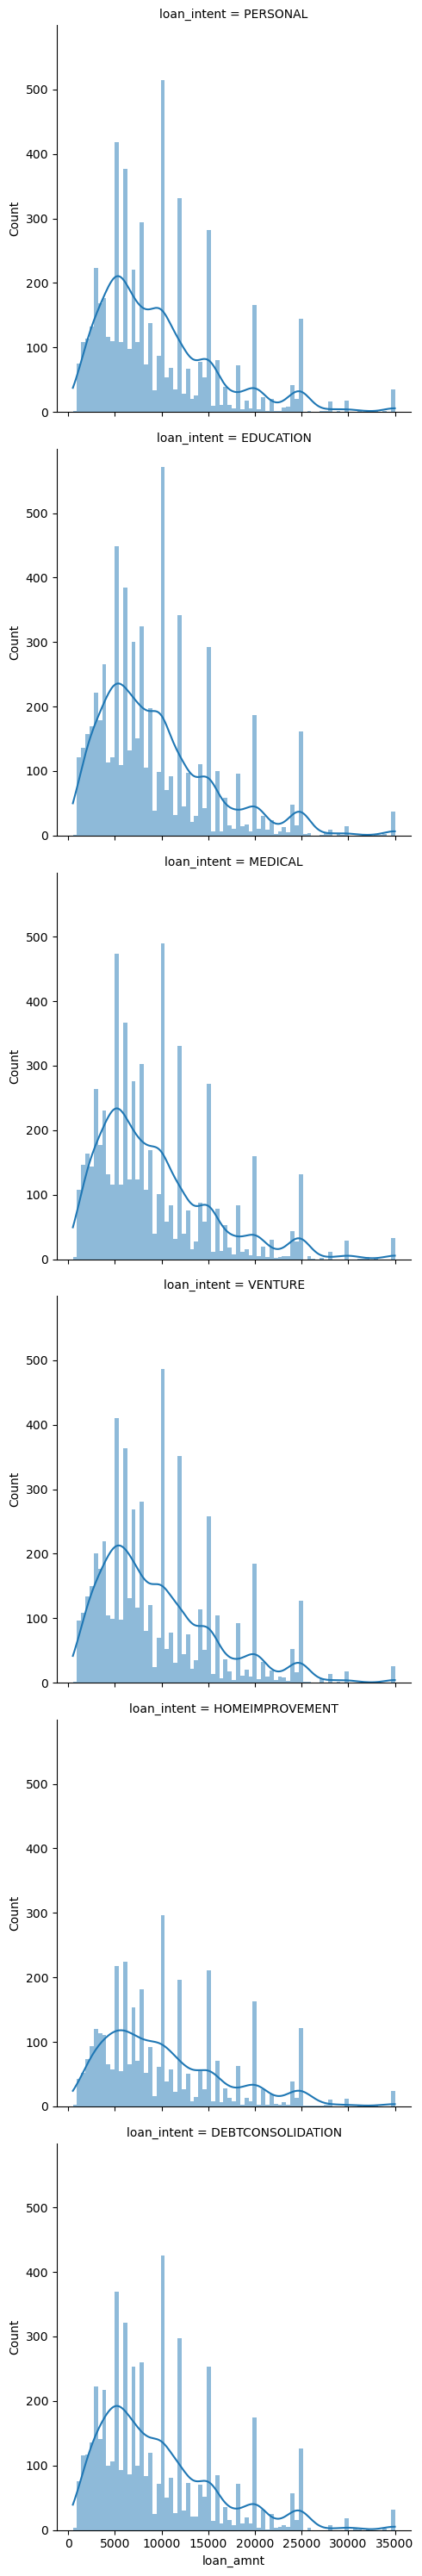

In [228]:
import matplotlib.pyplot as plt

sns.displot(x='loan_amnt', row='loan_intent', data=loan, linewidth=0, kde=True)
plt.show()

## Loan grade and loan status

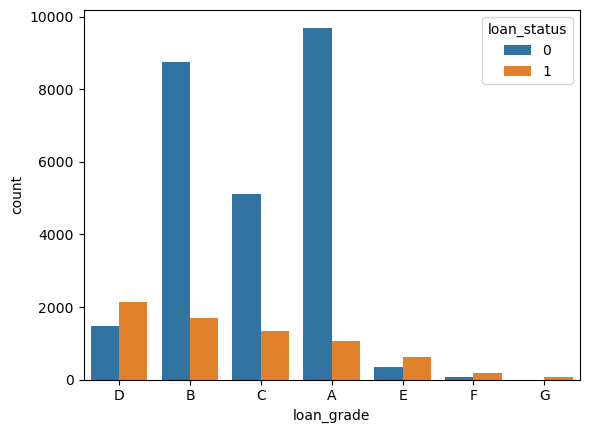

In [230]:
sns.countplot(x='loan_grade', hue='loan_status', data=loan)
plt.show()

## Enconding
### Encoding categorical variables to numerical variables, then understand the correlation between variables.

In [232]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(loan["person_home_ownership"])
loan["person_home_ownership"] = le.transform(loan["person_home_ownership"])

le.fit(loan["loan_intent"])
loan["loan_intent"] = le.transform(loan["loan_intent"])

le.fit(loan["loan_grade"])
loan["loan_grade"] = le.transform(loan["loan_grade"])

le.fit(loan["cb_person_default_on_file"])
loan["cb_person_default_on_file"] = le.transform(loan["cb_person_default_on_file"])

### Check the result with enconding

In [234]:
loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


## Correlation matrix

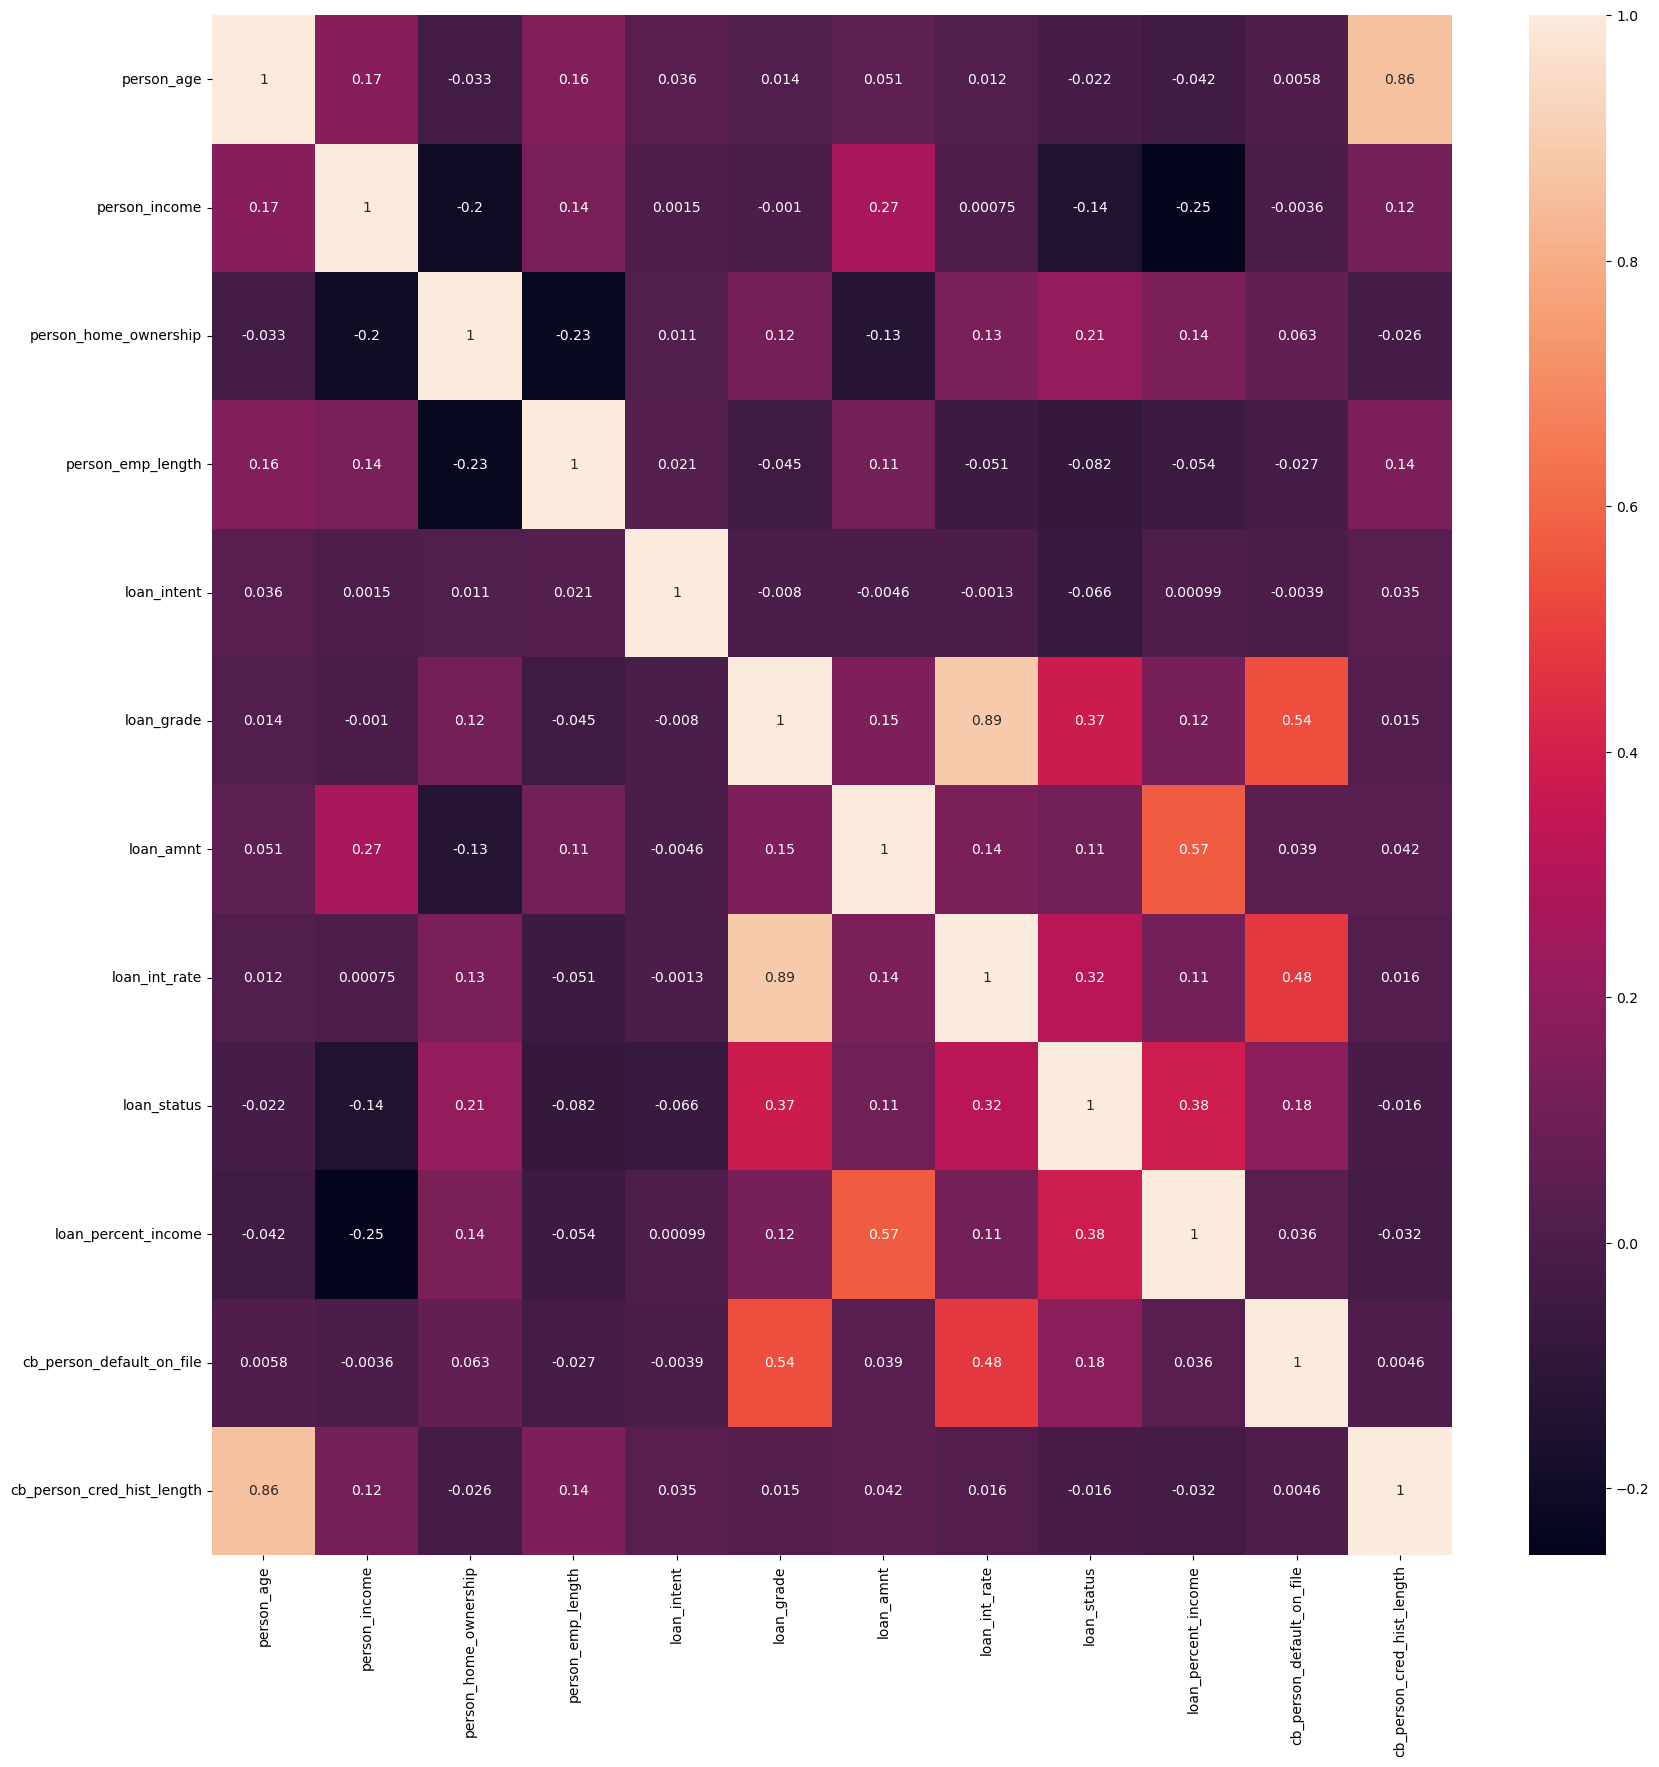

In [236]:
correlations=loan.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations,annot=True)
plt.show()

#### Since person`s age and length of the applicants credit history are correlated with value 0.86, hence dropping persons age
#### Since loan interest rate and loan grade are correlated with value 0.89, hence dropping loan interest rate

In [238]:
loan.drop(["person_age"],axis=1,inplace=True)

loan.drop(["loan_int_rate"],axis=1,inplace=True)

In [239]:
loan.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,59000,3,123.0,4,3,35000,1,0.59,1,3
1,9600,2,5.0,1,1,1000,0,0.10,0,2
2,9600,0,1.0,3,2,5500,1,0.57,0,3
3,65500,3,4.0,3,2,35000,1,0.53,0,2
4,54400,3,8.0,3,2,35000,1,0.55,1,4


## Normalizing data
#### High variables will not domain other during the modeling. It's useful to preserve the shape of the original distribution.


In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
loan["person_income"]=scaler.fit_transform(loan["person_income"].values.reshape(-1, 1)).flatten()
loan["person_emp_length"]=scaler.fit_transform(loan["person_emp_length"].values.reshape(-1, 1)).flatten()
loan["loan_amnt"]=scaler.fit_transform(loan["loan_amnt"].values.reshape(-1, 1)).flatten()

In [242]:
loan.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.009173,3,1.000000,4,3,1.000000,1,0.59,1,3
1,0.000934,2,0.040650,1,1,0.014493,0,0.10,0,2
2,0.000934,0,0.008130,3,2,0.144928,1,0.57,0,3
3,0.010257,3,0.032520,3,2,1.000000,1,0.53,0,2
4,0.008406,3,0.065041,3,2,1.000000,1,0.55,1,4


## Splitting the data into train and test sets

In [244]:
X = loan.drop('loan_status', axis=1)
y = loan['loan_status']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic regression

In [247]:
import statsmodels.api as sm

# Add the constant for the intercept
X_train_sm = sm.add_constant(X_train)  

log_model_sm = sm.Logit(y_train, X_train_sm).fit()

# See the summary for the coefficients
print(log_model_sm.summary())

X_test_sm = sm.add_constant(X_test, has_constant='add')  # Add the constant to see the test data
y_pred_log = log_model_sm.predict(X_test_sm) > 0.5  

accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)

Optimization terminated successfully.
         Current function value: 0.367231
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                26064
Model:                          Logit   Df Residuals:                    26054
Method:                           MLE   Df Model:                            9
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.2984
Time:                        23:13:55   Log-Likelihood:                -9571.5
converged:                       True   LL-Null:                       -13643.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.2446      0.075    -56.468      0.000      

In [248]:
X_train = X_train.drop(['person_income'], axis=1)
X_test = X_test.drop(['person_income'], axis=1)

In [249]:
# Add the constant for the intercept
X_train_sm = sm.add_constant(X_train)  

log_model_sm = sm.Logit(y_train, X_train_sm).fit()

# See the summary for the coefficients
print(log_model_sm.summary())

X_test_sm = sm.add_constant(X_test, has_constant='add')  # Add the constant to see the test data
y_pred_log = log_model_sm.predict(X_test_sm) > 0.5  

accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)

Optimization terminated successfully.
         Current function value: 0.367262
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                26064
Model:                          Logit   Df Residuals:                    26055
Method:                           MLE   Df Model:                            8
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.2984
Time:                        23:13:55   Log-Likelihood:                -9572.3
converged:                       True   LL-Null:                       -13643.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.2169      0.073    -57.854      0.000      

#### Drop person income, employment length and credit historic lenght, as they are not significant for the model (p-value more than 0.05), just to see how will change the results.

In [251]:
X_train = X_train.drop(['person_emp_length','cb_person_cred_hist_length'], axis=1)
X_test = X_test.drop(['person_emp_length','cb_person_cred_hist_length'], axis=1)

In [252]:
# Add the constant for the intercept
X_train_sm = sm.add_constant(X_train)  

log_model_sm = sm.Logit(y_train, X_train_sm).fit()

# See the summary for the coefficients
print(log_model_sm.summary())

X_test_sm = sm.add_constant(X_test, has_constant='add')  # Add the constant to see the test data
y_pred_log = log_model_sm.predict(X_test_sm) > 0.5  

accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)

Optimization terminated successfully.
         Current function value: 0.367292
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                26064
Model:                          Logit   Df Residuals:                    26057
Method:                           MLE   Df Model:                            6
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.2983
Time:                        23:13:55   Log-Likelihood:                -9573.1
converged:                       True   LL-Null:                       -13643.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.2353      0.064    -65.666      0.000      -4.

In [253]:
f1 = f1_score(y_test, y_pred_log)
print(f"F1 Score: {f1}")

F1 Score: 0.5443634804972138


## KNN

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_knn)

f1 = f1_score(y_test, y_pred_knn)

recall = recall_score(y_test, y_pred_knn)

print(conf_matrix)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"F1-Score: {f1}")
print(f"Sensivity: {recall}")

[[4875  197]
 [ 649  796]]
Accuracy: 0.8701856682522633
F1-Score: 0.6529942575881871
Sensivity: 0.5508650519031142


In [256]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 10)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best n_neighbors: {grid.best_params_}")

Best n_neighbors: {'n_neighbors': 5}


## Random Forest

In [258]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

f1 = f1_score(y_test, y_pred_rf)
print(f"F1-Score: {f1}")

recall = recall_score(y_test, y_pred_rf)
print(f"Sensivity: {recall}")

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)


Accuracy: 0.9291048593350384
F1-Score: 0.8158384267871379
Sensivity: 0.709990749306198
[[7547   66]
 [ 627 1535]]


## SVM

In [260]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")

f1 = f1_score(y_test, y_pred_svm)
print(f"F1-Score: {f1}")

recall = recall_score(y_test, y_pred_svm)
print(f"Sensivity: {recall}")

conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix)

Accuracy: 0.831824459106951
F1-Score: 0.4669260700389105
Sensivity: 0.33217993079584773
[[4941  131]
 [ 965  480]]


## Feature importance

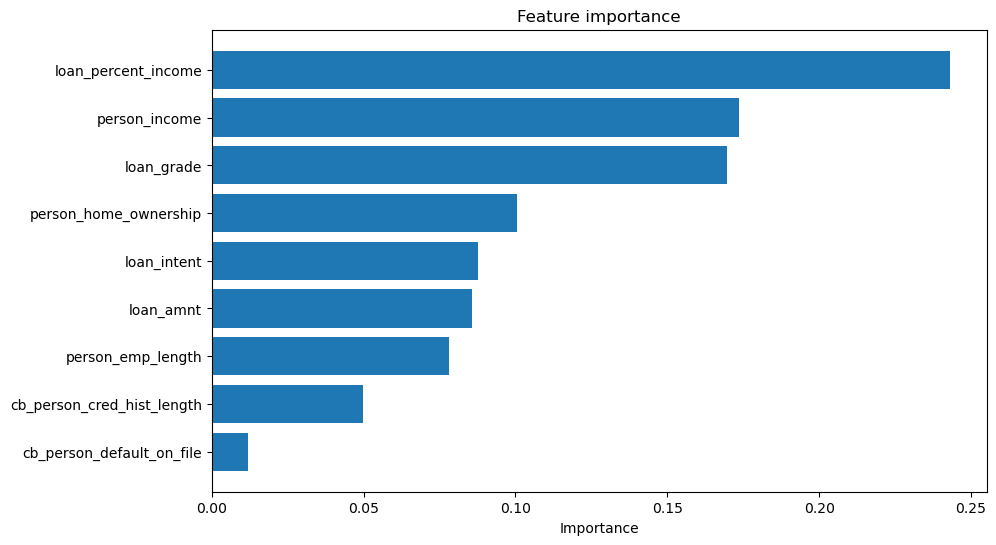

In [262]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_

features = X_train.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.show()